In [51]:
import cv2
import numpy as np
import os
import glob
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix
from skimage.feature import greycoprops
import image_slicer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [109]:
image_slicer.slice('dataset/train/pasto/pasto.jpg', 120)

(<Tile #1 - pasto_01_01.png>,
 <Tile #2 - pasto_01_02.png>,
 <Tile #3 - pasto_01_03.png>,
 <Tile #4 - pasto_01_04.png>,
 <Tile #5 - pasto_01_05.png>,
 <Tile #6 - pasto_01_06.png>,
 <Tile #7 - pasto_01_07.png>,
 <Tile #8 - pasto_01_08.png>,
 <Tile #9 - pasto_01_09.png>,
 <Tile #10 - pasto_01_10.png>,
 <Tile #11 - pasto_01_11.png>,
 <Tile #12 - pasto_02_01.png>,
 <Tile #13 - pasto_02_02.png>,
 <Tile #14 - pasto_02_03.png>,
 <Tile #15 - pasto_02_04.png>,
 <Tile #16 - pasto_02_05.png>,
 <Tile #17 - pasto_02_06.png>,
 <Tile #18 - pasto_02_07.png>,
 <Tile #19 - pasto_02_08.png>,
 <Tile #20 - pasto_02_09.png>,
 <Tile #21 - pasto_02_10.png>,
 <Tile #22 - pasto_02_11.png>,
 <Tile #23 - pasto_03_01.png>,
 <Tile #24 - pasto_03_02.png>,
 <Tile #25 - pasto_03_03.png>,
 <Tile #26 - pasto_03_04.png>,
 <Tile #27 - pasto_03_05.png>,
 <Tile #28 - pasto_03_06.png>,
 <Tile #29 - pasto_03_07.png>,
 <Tile #30 - pasto_03_08.png>,
 <Tile #31 - pasto_03_09.png>,
 <Tile #32 - pasto_03_10.png>,
 <Tile #33 - past

In [93]:
def extract_features(image):
    features = np.zeros(6)
    # calculate haralick texture features for 4 types of adjacency
    g = greycomatrix(image, [1], [0, np.pi/2], levels=256, normed=True, symmetric=True)
    features[0] = greycoprops(g, 'contrast').mean()
    features[1] = greycoprops(g, 'dissimilarity').mean()
    features[2] = greycoprops(g, 'homogeneity').mean()
    features[3] = greycoprops(g, 'ASM').mean()
    features[4] = greycoprops(g, 'energy').mean()
    features[5] = greycoprops(g, 'correlation').mean()
    
    return np.array(features)

def load_training_dataset():
    # load the training dataset
    train_path  = "dataset/train"
    train_names = os.listdir(train_path)

    # empty list to hold feature vectors and train labels
    train_features = []
    train_labels   = []

    # loop over the training dataset
    print ("[STATUS] Started extracting haralick textures..")
    for train_name in train_names:
        cur_path = train_path + "/" + train_name
        cur_label = train_name
        i = 1

        for file in glob.glob(cur_path + "/*.png"):
            #print ("Processing Image - {} in {}".format(i, cur_label))
            # read the training image
            image = cv2.imread(file)

            # convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # extract haralick texture from the image
            features = extract_features(gray)

            # append the feature vector and label
            train_features.append(features)
            train_labels.append(cur_label)
            # show loop update
            i += 1
    return train_features, train_labels

# loop over the test images

def load_test_image(path_imagen):    
    image = cv2.imread(path_imagen)
    #cv2.imshow("Testing image ", image)
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    # extract haralick texture from the image
    features = extract_features(gray)
    return image, features


In [114]:
def knn_clasifier(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors = 4)
    knn = knn.fit(X_train, y_train)
    print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
    return knn

def knn_predict(knn, image_name, image, features):
    # evaluate the model and predict label
    prediction = knn.predict(features.reshape(1, -1))[0]
    print("Image: " + image_name)
    # show the label
    #cv2.putText(image, prediction, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)
    print ("Prediction - {}".format(prediction))
    print('\n')
    #display the output image
    #cv2.imshow("Test_Image", image)
    #cv2.waitKey(0)

In [117]:

def svm_classifier(X_train, y_train):
    #create the classifier
    print ("[STATUS] Creating the classifier..")
    clf_svm = LinearSVC(random_state=9)

    # fit the training data and labels
    print ("[STATUS] Fitting data/label to model..")
    return clf_svm.fit(X_train, y_train)
    
def svm_predict(svm, image_name, image, features):
    # evaluate the model and predict label
    prediction = svm.predict(features.reshape(1, -1))[0]
    print("Image: " + image_name)
    # show the label
    #cv2.putText(image, prediction, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)
    print ("Prediction - {}".format(prediction))
    print('\n')
    #display the output image
    #cv2.imshow("Test_Image", image)
    #cv2.waitKey(0)

In [105]:
def lda_classifier(X_train, y_train):
    #create the classifier
    print ("[STATUS] Creating the classifier..")
    lda = LinearDiscriminantAnalysis()

    # fit the training data and labels
    print ("[STATUS] Fitting data/label to model..")
    return lda.fit(X_train, y_train)
    
def lda_predict(lda, image_name, image, features):
    # evaluate the model and predict label
    print(features.reshape(1, -1))
    prediction = lda.predict(features.reshape(1, -1))[0]
    print("Image: " + image_name)
    # show the label
    #cv2.putText(image, prediction, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)
    print ("Prediction - {}".format(prediction))
    print('\n')
    #display the output image
    #cv2.imshow("Test_Image", image)
    #cv2.waitKey(0)

In [111]:
def test_all_images(classifier):
    test_path = "dataset/test"
    train_dataset, train_labels = load_training_dataset()
    if(classifier == "svm"):
        svm = svm_classifier(train_dataset, train_labels)
        for file in glob.glob(test_path + "/*.png"):
            print(file)
            image, features = load_test_image(file)
            prediction = svm_predict(svm, file, image, features)
    elif(classifier == "knn"):
        knn = knn_clasifier(train_dataset, train_labels)
        for file in glob.glob(test_path + "/*.png"):
            print(file)
            image, features = load_test_image(file)
            prediction = knn_predict(knn, file, image, features)
    elif(classifier == "lda"):
        lda = lda_classifier(train_dataset, train_labels)
        for file in glob.glob(test_path + "/*.png"):
            print(file)
            image, features = load_test_image(file)
            prediction = lda_predict(lda, file, image, features)

        

In [118]:
test_all_images("svm")

[STATUS] Started extracting haralick textures..
[STATUS] Creating the classifier..
[STATUS] Fitting data/label to model..
dataset/test/ladrillo_01_01.png
Image: dataset/test/ladrillo_01_01.png
Prediction - ladrillo


dataset/test/ladrillo_01_02.png
Image: dataset/test/ladrillo_01_02.png
Prediction - ladrillo


dataset/test/pasto_01_11.png
Image: dataset/test/pasto_01_11.png
Prediction - ladrillo


dataset/test/pasto_01_08.png
Image: dataset/test/pasto_01_08.png
Prediction - pasto


dataset/test/pasto_01_07.png
Image: dataset/test/pasto_01_07.png
Prediction - pasto


dataset/test/pasto_01_10.png
Image: dataset/test/pasto_01_10.png
Prediction - ladrillo


dataset/test/pasto_01_02.png
Image: dataset/test/pasto_01_02.png
Prediction - ladrillo


dataset/test/ladrillo_01_06.png
Image: dataset/test/ladrillo_01_06.png
Prediction - ladrillo


dataset/test/ladrillo_01_05.png
Image: dataset/test/ladrillo_01_05.png
Prediction - ladrillo


dataset/test/pasto_01_06.png
Image: dataset/test/pasto_01_0

/home/bemesa/Documentos/Machine-learning/env/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [119]:
train_dataset, train_labels = load_training_dataset()
knn = knn_clasifier(train_dataset, train_labels)
image, features = load_test_image("ladrillo_02_02.png")
prediction = knn_predict(knn, "ladrillo_02_02.png", image, features)



[STATUS] Started extracting haralick textures..
Accuracy of K-NN classifier on training set: 1.00


error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


[STATUS] Started extracting haralick textures..


([<matplotlib.axis.XTick at 0x7fd5ab53ae50>,
 <a list of 5 Text xticklabel objects>)

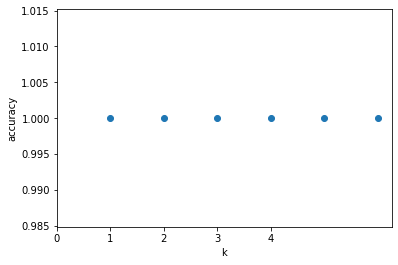

In [120]:
train_dataset, train_labels = load_training_dataset()
k_range = range(1, 7)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_dataset, train_labels)
    scores.append(knn.score(train_dataset, train_labels))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4])

In [11]:
train_dataset, train_labels = load_training_dataset()
svm = svm_classifier(train_dataset, train_labels)
image, features = load_test_image("ladrillo_02_02.png")
prediction = svm_predict(svm, image, features)


[STATUS] Started extracting haralick textures..
Processing Image - 1 in pasto
Processing Image - 2 in pasto
Processing Image - 3 in pasto
Processing Image - 4 in pasto
Processing Image - 5 in pasto
Processing Image - 6 in pasto
Processing Image - 7 in pasto
Processing Image - 8 in pasto
Processing Image - 9 in pasto
Processing Image - 10 in pasto
Processing Image - 11 in pasto
Processing Image - 12 in pasto
Processing Image - 13 in pasto
Processing Image - 14 in pasto
Processing Image - 1 in ladrillo
Processing Image - 2 in ladrillo
Processing Image - 3 in ladrillo
Processing Image - 4 in ladrillo
Processing Image - 5 in ladrillo
Processing Image - 6 in ladrillo
Processing Image - 7 in ladrillo
[STATUS] Creating the classifier..
[STATUS] Fitting data/label to model..
Prediction - pasto


/home/bemesa/Documentos/Machine-learning/env/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
